In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline

## Import IRIS dataset imputer using linear regression

In [2]:
#dataset = pd.read_csv('iris_with_missing_data.csv')
dataset = pd.read_csv('iris_LR_impute.csv')


dataset.head()

dataset.describe()

dataset.info()

dataset.isnull().sum()

## Control Graph

In [7]:
slmean = dataset['Sepal.Length'].mean()
slstd = dataset['Sepal.Length'].std()

swmean = dataset['Sepal.Width'].mean()
swstd = dataset['Sepal.Width'].std()

plmean = dataset['Petal.Length'].mean()
plstd = dataset['Petal.Length'].std()

pwmean = dataset['Petal.Width'].mean()
pwstd = dataset['Petal.Width'].std()

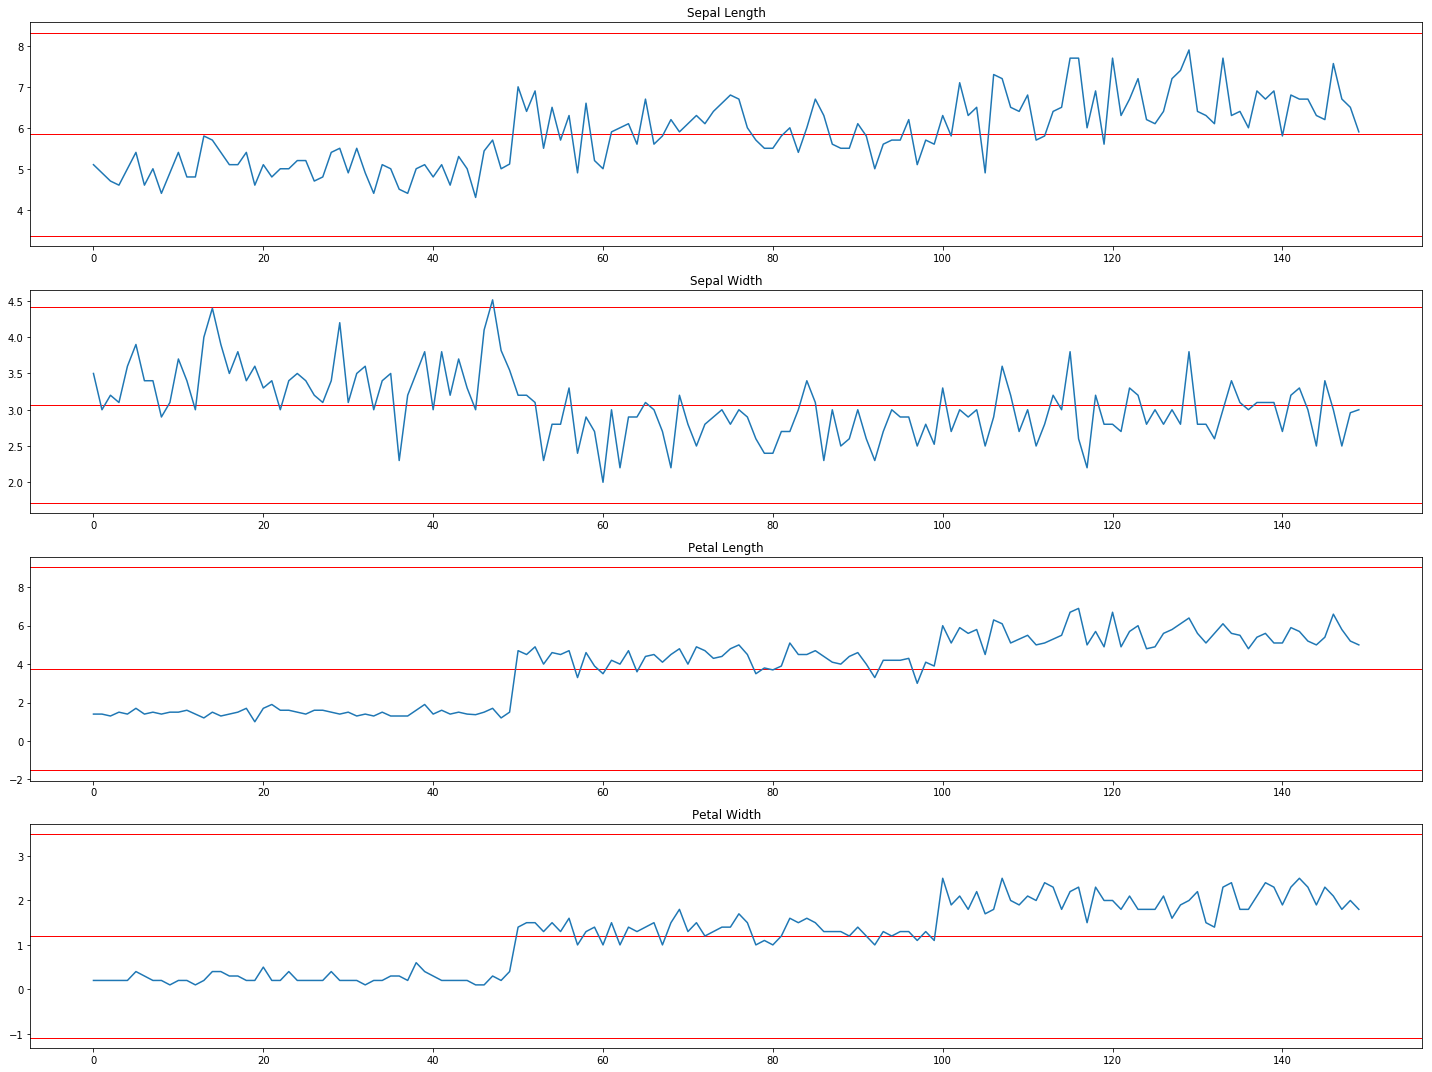

In [8]:
fig, ax = plt.subplots(4,1,figsize=(20,15))
ax[0].axhline(y=((slstd*3)+slmean) , linewidth=1, color='r')
ax[0].axhline(y=(slmean-(slstd*3)) , linewidth=1, color='r')
ax[0].axhline(y=slmean , linewidth=1, color='r')
ax[0].plot(dataset['Sepal.Length'])
ax[0].set_title('Sepal Length')

ax[1].axhline(y=((swstd*3)+swmean) , linewidth=1, color='r')
ax[1].axhline(y=(swmean-(swstd*3)) , linewidth=1, color='r')
ax[1].axhline(y=swmean , linewidth=1, color='r')
ax[1].plot(dataset['Sepal.Width'])
ax[1].set_title('Sepal Width')

ax[2].axhline(y=((plstd*3)+plmean) , linewidth=1, color='r')
ax[2].axhline(y=(plmean-(plstd*3)) , linewidth=1, color='r')
ax[2].axhline(y=plmean , linewidth=1, color='r')
ax[2].plot(dataset['Petal.Length'])
ax[2].set_title('Petal Length')

ax[3].axhline(y=((pwstd*3)+pwmean) , linewidth=1, color='r')
ax[3].axhline(y=(pwmean-(pwstd*3)) , linewidth=1, color='r')
ax[3].axhline(y=pwmean , linewidth=1, color='r')
ax[3].plot(dataset['Petal.Width'])
ax[3].set_title('Petal Width')
plt.tight_layout()
plt.show()


## PCA Analysis

In [22]:
dataset = dataset.drop('Species', axis=1)

In [23]:
X = dataset.values

## Standardize for equal variance i.e mean=0 and Sd=1

###### Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.

In [24]:
X = scale(X)

### Select Components that attribute for 90% Variance 

In [59]:
pca = PCA(.90)

In [60]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
var = pca.explained_variance_ratio_

In [62]:
var

array([0.73086647, 0.22773848])

In [63]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [64]:
var1

array([73.09, 95.86])

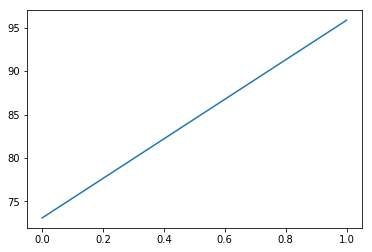

In [53]:
plt.plot(var1)

### Load Prinicipal Components into an array

In [54]:
X1 = pca.fit_transform(X)

In [55]:
newdataset = pd.DataFrame(data = X1, columns = ['pc1', 'pc2'])

In [44]:
pca.get_covariance()

array([[ 1.00671141, -0.11999492,  0.87578779,  0.82176085],
       [-0.11999492,  1.00671141, -0.44163779, -0.37970074],
       [ 0.87578779, -0.44163779,  1.00671141,  0.96922987],
       [ 0.82176085, -0.37970074,  0.96922987,  1.00671141]])

In [45]:
pca.get_precision()

array([[  7.11749581,  -2.51616807, -10.78892275,   3.62832477],
       [ -2.51616807,   2.16366699,   5.13164979,  -2.07061715],
       [-10.78892275,   5.13164979,  31.30958359, -19.40156632],
       [  3.62832477,  -2.07061715, -19.40156632,  15.9298359 ]])

In [56]:
newdataset

,pc1,pc2
0,-2.257291,0.419733
1,-2.076870,-0.697881
2,-2.358442,-0.384230
3,-2.294108,-0.633228
4,-2.381566,0.577261
5,-2.065763,1.401282
6,-2.436672,-0.012006
7,-2.225980,0.169331
8,-2.330554,-1.138245
9,-2.179432,-0.500434
